## **Prediksi Kasus Covid-19**

Assalamualaikum warahmatullah wabarakatuh
Pada kesempatan kali ini saya akan membuat project prediksi kasus covid-19 menggunakan linear regression. data covid terbaru yang saya gunakan saya dapatkan dari link berikut ini
https://github.com/owid/covid-19-data/tree/master/public/data

In [9]:
#import library untuk kebutuhan project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
#memanggil fungsi upload untuk upload file data file covid (1 kali upload)
#uploadfile = files.upload()

Saving covid19.csv to covid19.csv


In [10]:
#menampilkan data dari file
df = pd.read_csv('covid19.csv',delimiter=',')
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [26]:
#melakukan slicing untuk data covid di Indonesia
dfindonesia = df.loc[df['location']=='Indonesia']
dfindonesia = dfindonesia[['location','date','new_cases','new_deaths','new_vaccinations','new_tests','stringency_index']]
dfindonesia.reset_index(drop=True, inplace=True)
dfindonesia.head(10)

,location,date,new_cases,new_deaths,new_vaccinations,new_tests,stringency_index
0,Indonesia,2020-03-02,2.0,NaN,NaN,NaN,28.70
1,Indonesia,2020-03-03,0.0,NaN,NaN,NaN,37.04
2,Indonesia,2020-03-04,0.0,NaN,NaN,NaN,37.04
3,Indonesia,2020-03-05,0.0,NaN,NaN,NaN,37.04
4,Indonesia,2020-03-06,2.0,NaN,NaN,NaN,37.04
5,Indonesia,2020-03-07,0.0,NaN,NaN,NaN,37.04
6,Indonesia,2020-03-08,2.0,NaN,NaN,NaN,37.04
7,Indonesia,2020-03-09,13.0,NaN,NaN,NaN,37.04
8,Indonesia,2020-03-10,8.0,NaN,NaN,NaN,37.04
9,Indonesia,2020-03-11,7.0,1.0,NaN,NaN,37.04


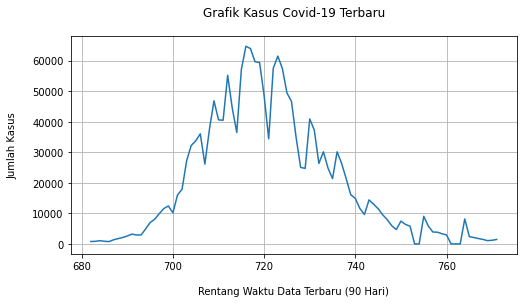

In [27]:
#Melakukan pengambilan dan menampilkan data kasus baru pada rentang 90 hari
dfindonesia = dfindonesia.iloc[len(dfindonesia)-90:]
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
plt.plot(dfindonesia['new_cases'])
ax.set_title("Grafik Kasus Covid-19 Terbaru", pad=20)
ax.set_xlabel("Rentang Waktu Data Terbaru (90 Hari)", labelpad=15)
ax.set_ylabel("Jumlah Kasus", labelpad=15)
plt.grid()
plt.show()

In [28]:
#melakukan slicing untuk data kasus baru, vaksin baru , indeks stringency, hasil test terbaru
dfindo = dfindonesia[['new_cases','new_vaccinations','stringency_index','new_tests']]
dfindo.shape
dfindo.head(10)

,new_cases,new_vaccinations,stringency_index,new_tests
682,793.0,NaN,66.2,195527.0
683,850.0,NaN,66.2,198375.0
684,1054.0,NaN,66.2,196420.0
685,855.0,NaN,66.2,166505.0
686,772.0,NaN,66.2,178283.0
687,1362.0,NaN,66.2,194308.0
688,1745.0,NaN,66.2,152016.0
689,2116.0,NaN,66.2,183531.0
690,2604.0,NaN,66.2,200180.0
691,3205.0,NaN,66.2,194500.0


In [29]:
#melakukan data cleaning pada data yang bernilai Na
dfindo = dfindo.dropna()
dfindo.reset_index(drop=True, inplace=True)
dfindo.shape
dfindo.head(10)

,new_cases,new_vaccinations,stringency_index,new_tests
0,26121.0,1644652.0,66.2,180967.0
1,37492.0,976992.0,66.2,284638.0
2,46843.0,1799355.0,66.2,245825.0
3,40618.0,1153911.0,66.2,238688.0
4,44526.0,113460.0,66.2,272493.0
5,36501.0,1304277.0,66.2,273914.0
6,57049.0,1308005.0,66.2,358270.0
7,64718.0,1254861.0,66.2,348080.0
8,63956.0,1380760.0,66.2,344393.0
9,59635.0,1346827.0,66.2,307607.0


In [30]:
#memisahkan data yang akan digunakan untuk train dan tes
x = dfindo[['new_vaccinations','stringency_index','new_tests']].values
y = dfindo[['new_cases']].values
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.33,shuffle=False,random_state=42)

0.7939461825852687
[[0.00063534 0.         0.2021689 ]]
[-9170.52150695]
Mean Absolute Error (MAE):  4546.152080872492
Nilai R Squared:  74.58628643729969 %


11

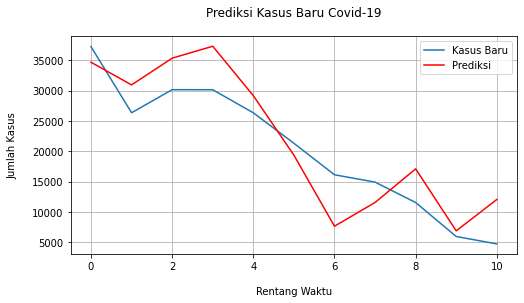

In [31]:
#Melatih model
regresi = LinearRegression().fit(x_train,y_train)
print(regresi.score(x_train,y_train))
print(regresi.coef_)
print(regresi.intercept_)

#melakukan prediksi
y_pred = regresi.predict(x_test)

#melakukan pengukuran performa
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Nilai R Squared: ",r2_score(y_test,y_pred)*100,"%")

#menampilkan grafik
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
plt.plot(y_test, label="Kasus Baru")
plt.plot(y_pred,'r', label = "Prediksi")
ax.set_title("Prediksi Kasus Baru Covid-19", pad=20)
ax.set_xlabel("Rentang Waktu", labelpad=15)
ax.set_ylabel("Jumlah Kasus", labelpad=15)
plt.legend()
plt.grid()
len(y_pred)

# **Analisa Hasil dari Prediksi Data Covid-19**
Berdasarkan hasil dari prediksi yang dilakukan model yang dibuat mempunyai performa yang cukup baik ini diukur dengan perhitunga R Square yang mendapatkan hasil **74.58%**, artinya model kuadratic mampu menjelaskan nilai y sebesar **74.58%**, sedangkan sisanya adalah nilai error. Kategori model ini sudah dapat dikatakan **baik** untuk digunakan meramalkan data berikutnya.